/var/tmp/ipykernel_332769/2652887973.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range_high_res = pd.date_range(start='2024-09-01 00:00', end='2024-09-03 00:00', freq='30T')
/var/tmp/ipykernel_332769/2652887973.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range_low_res = pd.date_range(start='2024-09-01 06:00', end='2024-09-03 06:00', freq='1H')


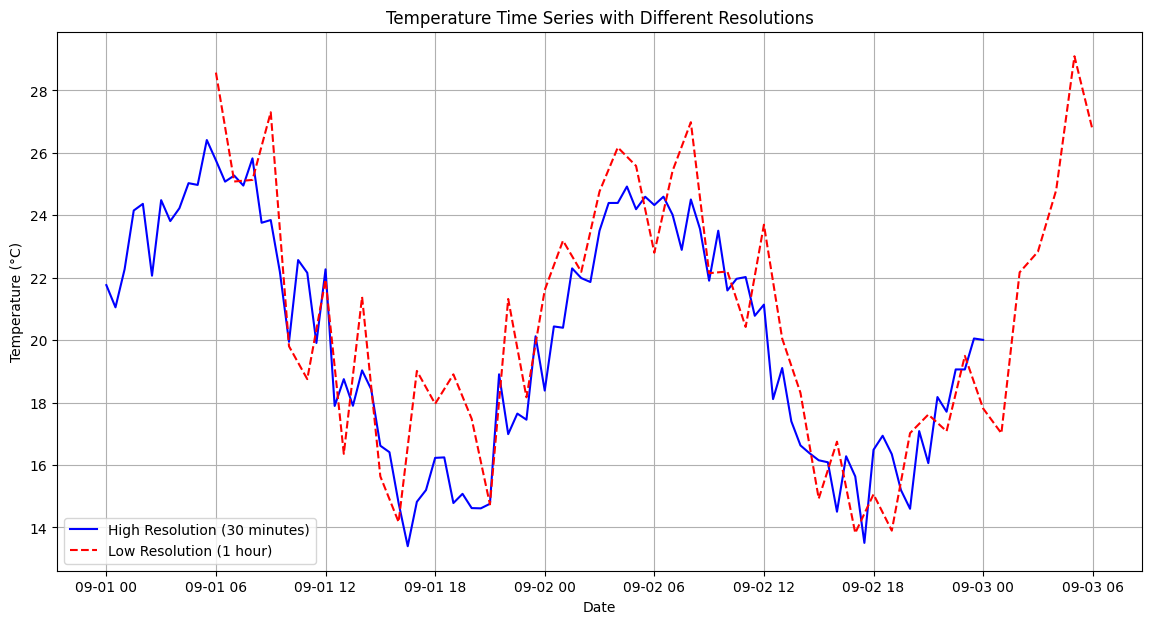

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate date ranges
date_range_high_res = pd.date_range(start='2024-09-01 00:00', end='2024-09-03 00:00', freq='30T')
date_range_low_res = pd.date_range(start='2024-09-01 06:00', end='2024-09-03 06:00', freq='1H')

# Generate synthetic temperature data
np.random.seed(0)  # For reproducibility
temperature_high_res = 20 + 5 * np.sin(np.linspace(0, 4 * np.pi, len(date_range_high_res))) + np.random.normal(0, 1, len(date_range_high_res))
temperature_low_res = 20 + 5 * np.sin(np.roll(np.linspace(0, 4 * np.pi, len(date_range_low_res)),-6)) + np.random.normal(0, 2, len(date_range_low_res))

# Create DataFrames
df_high_res = pd.DataFrame({'Date': date_range_high_res, 'Temperature': temperature_high_res})
df_low_res = pd.DataFrame({'Date': date_range_low_res, 'Temperature': temperature_low_res})

# Plotting
plt.figure(figsize=(14, 7))

# High resolution time series (30 minutes)
plt.plot(df_high_res['Date'], df_high_res['Temperature'], label='High Resolution (30 minutes)', color='blue', linestyle='-')

# Low resolution time series (1 hour)
plt.plot(df_low_res['Date'], df_low_res['Temperature'], label='Low Resolution (1 hour)', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Time Series with Different Resolutions')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='Date'>

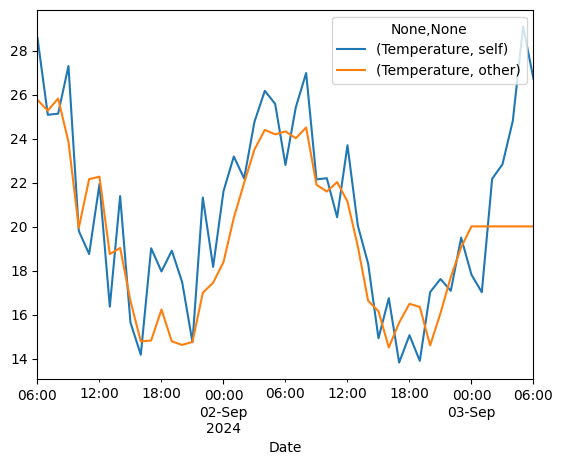

In [11]:
import pandas as pd

df1 = df_low_res
df2 = df_high_res
# Example DataFrames

# Set 'time' as the index for both DataFrames
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

# Reindex df2 to the time indices of df1
df2_resampled = df2.reindex(df1.index, method='nearest')

# Now you can compare or perform any operation
comparison = df1.compare(df2_resampled)
comparison.plot()